<center>Rencontre Polytechnique - Enseignants du secondaire</center>
<center>Loïc Gouarin <a href="mailto:loic.gouarin@polytechnique.edu">(écrire)</a></center>

# Maths expérimentales : calcul d'aires

Cette session se place dans le contexte suivant :
* Terminale Voie Générale (mathématiques complémentaires)
 - Calcul d'aires
     * Approximation de l’aire sous la courbe de la fonction exponentielle sur $[0,1]$ par la méthode des rectangles.
     * Approximation de $\pi$ et aire d’un disque.


Nous allons dans un premier temps nous intéresser au calcul approché de l'intégrale suivante

$$
\int_0^1 e^{-20(x-0.5)^2} dx
$$

Nous pouvons utiliser SymPy pour avoir l'expresion exacte

In [1]:
import sympy as sp
x = sp.symbols('x')
a, b = 0, 1
expr = sp.exp(-20*(x-.5)**2)

In [2]:
 sp.integrate(expr, (x, a, b))

sqrt(5)*sqrt(pi)*erf(1.0*sqrt(5))/10

Une valeur numérique approchée est

In [3]:
 sp.integrate(expr, (x, a, b)).evalf()

0.395712309610514

Nous pouvons représenter la fonction à l'aide de matplotlib.

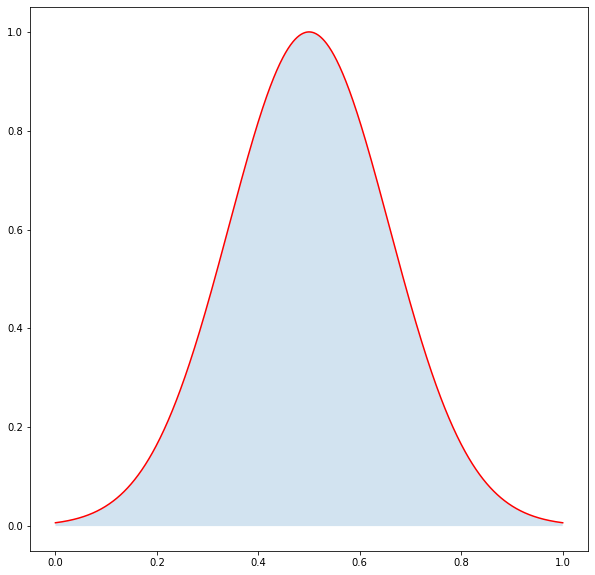

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = sp.lambdify('x', expr)
x = np.linspace(a, b, 1000)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x, f(x), color='red')
ax.fill_between(x, f(x), 0, alpha=.2)
plt.show()

La valeur de l'intégrale est l'aire qui est représentée en bleu clair sur la figure. Pour calculer cette aire de manière approchée, nous allons utiliser la méthode des rectangles. L'idée est de décomposer l'intervalle en plusieurs sous intervalles et de calculer la somme des aires des rectangles en interpolant la fonction à intégrer par une constante.

Ainsi on a

$$
\int_a^b f(x)dx \approx \sum_{i=1}^n (x_{i+1} - x_{i})f(\xi),
$$

avec $x_1=a$ et $x_{n+1}=b$. $\xi$ peut prendre différentes valeurs $x_i$, $x_{i+1}$ ou encore $\frac{x_{i+1} + x_i}{2}$.

Cette algorithme peut s'écrire en Pythonde la manière suivante

In [5]:
def rectangle(f, a, b, n, case=1):
    x = np.linspace(a, b, n+1)
    if case == 1:
        return np.sum(f(x[:-1])*(x[1:] - x[:-1]))
    elif case == 2:
        return np.sum(f(x[1:])*(x[1:] - x[:-1]))
    elif case == 3:
        return np.sum(.5*(f(x[1:]) + f(x[:-1]))*(x[1:] - x[:-1]))

Regardons à présent la valeur que l'on obtient si on prend 10 intervalles entre $[0, 1]$

In [6]:
rectangle(f, a, b, 10)

0.3954979565789398

Regardons visuellement ce qui se passe.

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

def coord_rectangle(f, a, b, n, case=1):
    x = np.linspace(a, b, n+1)
    fx = f(x)

    if case == 1:
        f_interp = lambda i: fx[i]
    elif case == 2:
        f_interp = lambda i: fx[i+1]
    elif case == 3:
        f_interp = lambda i: .5*(fx[i+1] + fx[i])
    
    polygons = [Polygon([[x[i], 0],
                         [x[i], f_interp(i)],
                         [x[i+1], f_interp(i)],
                         [x[i+1], 0]], True) for i in range(n)]
    return polygons

In [8]:
from ipywidgets import interactive_output, IntSlider, VBox, Dropdown, Layout

def mywidget(n, case):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    x = np.linspace(a, b, 1000)
    polygons = coord_rectangle(f, a, b, n, case)
    p = PatchCollection(polygons, alpha=0.2, edgecolor='b')
    ax.add_collection(p)
    ax.plot(x, f(x), 'r', linewidth=1)
    ax.autoscale_view()
    plt.show()

n = IntSlider(value=2,
              min=1,
              max=40,
              description="Nombre d'intervalles",
              style={'description_width': 'initial'},
              layout=Layout(width='auto', height='auto'))

interp_choice = Dropdown(
    options=[('Gauche', 1), ('Droite', 2), ('Milieu', 3)],
    value=1,
    description="Point d'interpolation",
    style={'description_width': 'initial'},
    layout=Layout(width='auto', height='auto')
)

interactive_plot = interactive_output(mywidget,
                                      {'n': n, 'case': interp_choice})

VBox([interactive_plot, n, interp_choice])

Nous pouvons à présent essayer de calculer une approximation de $\pi$ en calculant l'aire d'un quart de disque. L'intégrale à calculer est

$$
\int_0^1 \sqrt{1 - (x-1)^2} dx = \frac{\pi}{4}.
$$

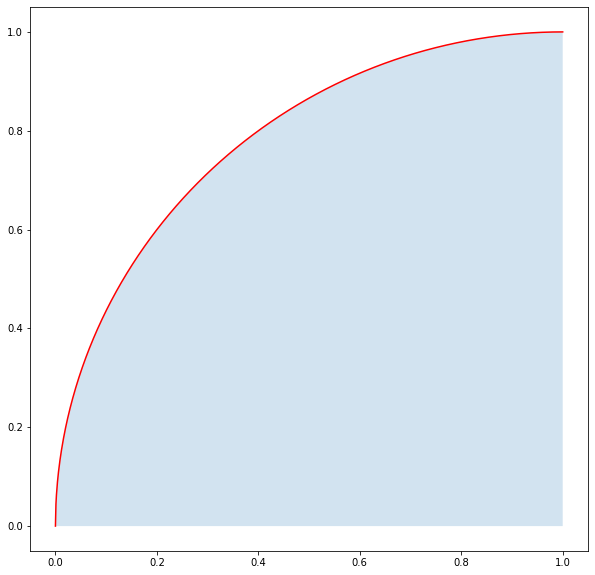

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sqrt(1 - (x-1)**2)
x = np.linspace(a, b, 1000)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(x, f(x), color='red')
ax.fill_between(x, f(x), 0, alpha=.2)
plt.show()

Regardons ce que l'on obtient en fonction du point d'interpolation:

- à droite

In [10]:
4*rectangle(f, 0, 1, 1000, case=1)

3.1395554669110277

- à gauche

In [11]:
4*rectangle(f, 0, 1, 1000, case=2)

3.1435554669110273

- au milieu

In [12]:
4*rectangle(f, 0, 1, 1000, case=3)

3.141555466911028

En rappelant les premières décimales de $\pi$

In [13]:
np.pi

3.141592653589793

On constate que la méthode des rectangles avec le point d'interpolation milieu est beaucoup plus précise que les deux autres puisque nous avons 4 chiffres significatifs au lieu de deux pour les deux autres.